<h1><center>Laboratorio 3: El Pandas no muerde 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: **SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Lucas Orellana Jara
- Nombre de alumno 2: Elizabeth Ramírez Zamorano

### **Link de repositorio de GitHub Elizabeth :** [Repositorio](https://github.com/ElizabethVRZ/MDS7202_1_Laboratorio_Programacion)
### **Link de repositorio de GitHub Lucas:** [Repositorio](https://github.com/ElLuquitas/MDS7202-labs.git)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [150]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display

#Libreria para plotear
# %pip install --upgrade plotly
import plotly.express as px

# Librerias utiles
from sklearn.preprocessing import StandardScaler

# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos.
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados.




In [151]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1. Carga e Inspección de Datos [1.0 Puntos]


<p align="center">
  <img src="https://i.imgur.com/44knnIf.png" width="500" height="500">
</p>

*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset.


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```





In [152]:
df_grades = pd.read_json('students_grades.json')
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37,46,46
1,Madeline Fuller,female,group C,some high school,standard,none,124,142,142
2,Daniel Rester,male,group E,associate's degree,standard,none,156,196,193
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80,78,81
4,Geraldine Hale,female,group A,associate's degree,standard,none,131,166,166


In [153]:
# Revisamos el tipo de datos de cada columna
df_grades.dtypes

names                          object
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                     object
reading score                  object
writing score                  object
dtype: object

In [154]:
# En algunas columnas remplazamos '' por None:
df_grades['math score'] = df_grades['math score'].replace('', None)
df_grades['reading score'] = df_grades['reading score'].replace('', None)
df_grades['writing score'] = df_grades['writing score'].replace('', None)

# Cambiamos el tipo de data de las columnas según corresponda
df_grades = df_grades.astype({'names': 'string',
                              'gender': 'category',
                              'race/ethnicity': 'string',
                              'parental level of education': 'string',
                              'lunch': 'string',
                              'test preparation course': 'string',
                              'math score': 'float64',
                              'reading score': 'float64',
                              'writing score': 'float64'})


<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **1000** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **1000** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier registro que posea un valor diferente a esta escala, **debería ser eliminado de la base de datos**.


> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas.

**To-Do**
1. [X] Imprimir un mensaje con las dimensiones del Dataframe.
2. [X] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [X] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [X] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [X] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [X] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [X] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [X] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).

Finalmente, responda las siguientes preguntas (comente esto en la celda ubicada debajo de **justificación**.):

9. [X] ¿Qué anomalías es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados?


10. [X] Su compañero ChatGPT le provee un código para que pueda entender los resultados de las pruebas desde un gráfico. ¿Qué puede interpretar de la distribución de las notas en el boxplot?

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c)

**Respuesta:**

In [155]:
#Definición de la función 
def exploratory_data_analysis(dataframe):
    '''
    Recibe un dataframe y realiza un análisis exploratorio de los datos.

    Args
        dataframe (pd.DataFrame): Datos a analizar.
    '''
    print(f'Dimensiones del dataframe: {dataframe.shape}\n')

    print(f'Columnas del dataframe: {dataframe.columns}\n')

    print('Primeros 5 registros:')
    display(dataframe.head())

    print('Últimos 5 registros:')
    display(dataframe.tail())

    print('Muestra aleatoria:')
    display(dataframe.sample(5))

    print('Descripción de variables numéricas:')
    display(dataframe.describe())

    print('Cantidad de valores nulos por columna:')
    display(dataframe.isnull().sum())

    print('Cantidad de valores únicos:')
    display(dataframe.nunique())

    #---------------------------------------------------------
    print(f'Cantidad de nombres repetidos: {dataframe.duplicated(subset = ["names"]).sum()}\n')

    print('Muestras de nombres repetidos:')
    display(dataframe[dataframe.duplicated(subset = ["names"])])
    #---------------------------------------------------------

In [156]:
#Implementación de la función creada
exploratory_data_analysis(df_grades)

Dimensiones del dataframe: (1400, 9)

Columnas del dataframe: Index(['names', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Primeros 5 registros:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0


Últimos 5 registros:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0


Muestra aleatoria:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
704,Emily Devins,female,group B,associate's degree,standard,none,47.0,49.0,50.0
74,Susan Palmo,female,group C,some college,free/reduced,completed,63.0,73.0,71.0
1283,Nicole Obrien,female,group B,bachelor's degree,free/reduced,none,193.0,124.0,124.0
1085,Cody Garcia,male,group B,some high school,standard,completed,79.0,85.0,86.0
911,Theresa White,female,group E,some college,standard,none,67.0,76.0,75.0


Descripción de variables numéricas:


,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852919
std,47.152422,46.385775,47.043570
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000


Cantidad de valores nulos por columna:


names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64

Cantidad de valores únicos:


names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64

Cantidad de nombres repetidos: 247

Muestras de nombres repetidos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0


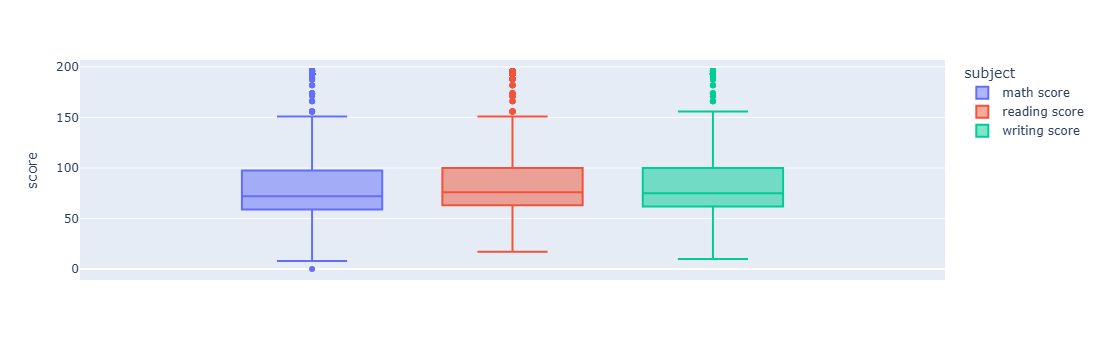

In [157]:
# Código del amigo ChatGPT (listo para usar)
fig = px.box(
    df_grades.melt(
        value_vars=["math score", "reading score", "writing score"],
        var_name="subject",
        value_name="score",
    ),
    y="score",
    color="subject",
)
fig.show()

**Justificación:**

**¿Qué anomalías es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados?**

La primera "anomalía" es que, tal como vienen los datos en formato `.json`, el método `pd.read_json()` toma todas las columnas como si tuviesen datos tipo `object`, lo cual impide que se puedan trabajar por ejemplo con datos numéricos o con strings de manera diferenciada, por lo que, al percatarse de este defecto, se debe hacer la conversión necesaria al tipo de objeto adecuado de cada variable.

Luego, haciendo un análisis de los mismos datos, podemos dar cuenta primero de que aproximadamente el 25% de las notas obtenidas en las 3 categorías están fuera del rango, es decir, presentan valores sobre el 100. Además, una cantidad más o menos pareja de datos nulos en las columnas `math score` (40 nulos), `reading score` (40 nulos) y `writing score` (47 nulos). Luego, como este dataset se enfoca en las características **por persona**, nos interesa ver la cantidad de nombres repetidos, habiendo 247 de ellos que se repiten (y un total de 1.153 nombres únicos).


**Su compañero ChatGPT le provee un código para que pueda entender los resultados de las pruebas desde un gráfico. ¿Qué puede interpretar de la distribución de las notas en el boxplot?**
El boxplot muestra la distribución de los datos. La caja contiene el 50% de los datos, ya que están contenidos los datos entre el cuartil 1 (Q1) y el cuartil 3 (Q3). El rango intercuartil o RIC se calcula como  RIC=Q3-Q1.  La línea de en medio de la caja es la mediana o el cuartil 2 (Q2). La línea horizontal inferior y superior es el límite inferior (LI) y superior (LS) de la distribución (se calculan como LI=Q1-1.5*RIC, LS=Q3+1.5*RIC). Los valores solitarios sobre los límites superior e inferior son los valores atípicos o que sobrepasan el 1.5*RIC de desviación con respecto al Q1 y Q3.  

En este caso, se ve la distribución de los datos en las tres materias: math, reading y writing. Como se menciona en el enunciado de la tarea, los valores sobre 100 no son reales, ya que no se puede tener más de un 100% de logro. Se ve que el Q3 en las tres asignaturas esta cercano al 100% de logro, esto quiere decir que hay aproximadamente un 25% de datos que están fuera del rango.

Math tiene el valor más bajo de logro, con un valor atipico que es 0. La mediana menor es la de Math con un 72% y la mediana mayor es la de reading con un 76%. 

La interpretación no  estan directa al haber valores fuera de rango, ya que al sacar esos valores, podría cambiar la distribución, pero se ve que el 25% de los datos o el Q1 esta sobre el 50% de logro en las pruebas. 

La distribución de las notas no es normal en ninguna de las tres materias, ya que si fuera una distribución normal, tendría un boxplot simétrico. 
Las distribuciones parecieran tener los datos más concentrados hacia la izquierda, hacia los valores inferiores de logro, a esto se le llama asimetría positiva.  



## 2 Limpieza de Datos [1.0 puntos]




<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>

En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y **cree una función** que le permita limpiar los datos. Habiendo limpiado el `DataFrame`, compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**
- [X] Eliminar registros con valores nulos.
- [X] Eliminar valores fuera del rango válido.
- [X] Eliminar registros con nombres duplicados
- [X] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hints**

- Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.
- Cuidado con el orden en la limpieza de datos. ¿Que se debe eliminar primero, los nombres duplicados o los registros fuera del rango posible?


> Utilice la función creada en el punto 1 para verificar sus resultados.

**Respuesta:**

In [158]:
# Definición de la función
def clean_data(dataframe):
    '''
    Limpia el dataset entregado por el usuario, centrándose en 3 aspectos:
    - Eliminar valores nulos.
    - Elimina valores fuera de rango (sobre 100).
    - Eliminar registros con nombres duplicados.

    Args
        dataframe (pd.DataFrame): Datos a limpiar.
    '''
    # Eliminamos filas con valores nulos
    dataframe = dataframe.dropna()

    # Eliminamos valores fuera de rango
    dataframe = dataframe[(dataframe['math score'] <= 100) &
                          (dataframe['reading score'] <= 100) &
                          (dataframe['writing score'] <= 100)]
    
    # Eliminamos registros con nombres duplicados
    dataframe = dataframe.drop_duplicates(subset = ['names'])

    return dataframe

In [159]:
#Implementación de la función
df_grades = clean_data(df_grades)
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


In [160]:
#Usar la función creada en la primera parte
exploratory_data_analysis(df_grades)

Dimensiones del dataframe: (1000, 9)

Columnas del dataframe: Index(['names', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Primeros 5 registros:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0


Últimos 5 registros:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0


Muestra aleatoria:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
809,Arthur Daschofsky,male,group A,some high school,free/reduced,none,39.0,39.0,34.0
1343,Fannie Alvarez,female,group D,some college,free/reduced,none,69.0,65.0,74.0
487,Aimee Tamayo,female,group C,some high school,standard,completed,59.0,54.0,67.0
25,David Dupree,male,group B,high school,standard,completed,73.0,69.0,68.0
156,Pamela Cannady,female,group B,bachelor's degree,free/reduced,none,75.0,85.0,82.0


Descripción de variables numéricas:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Cantidad de valores nulos por columna:


names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Cantidad de valores únicos:


names                          1000
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       81
reading score                    72
writing score                    77
dtype: int64

Cantidad de nombres repetidos: 0

Muestras de nombres repetidos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


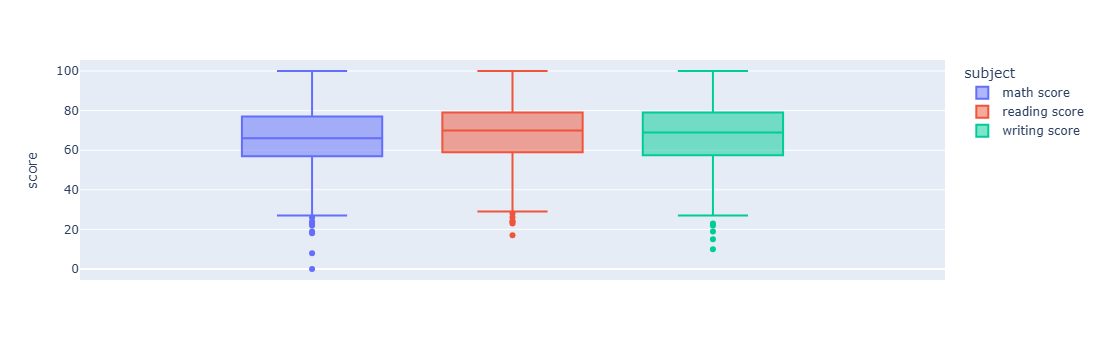

In [161]:
# Código del amigo ChatGPT 

fig = px.box(
    df_grades.melt(
        value_vars=["math score", "reading score", "writing score"],
        var_name="subject",
        value_name="score",
    ),
    y="score",
    color="subject",
)
fig.show()

**Justificación:**

```
En base a lo aplicado, se logro tener un total de 1000 filas o 1000 alumnos. Se eliminaron 400 filas.
Primero se eliminan valores nulos y valores fuera de rango. Luego se eliminan las filas con nombres duplicados.
El nuevo dataframe limpio tiene 1000 filas y 9 columnas.

Con respecto al gráfico, ahora si se ve que el valor máximo de logro en cualquiera de las tres pruebas es un 100%. Se ve que al eliminar los valores fuera de rango cambio un poco la distrubución. La materia con mayor mediana sigue siendo reading y la con menor mediana es math.

Ahora los valores atipicos aparecen en la parte inferior, bajo el limite inferior de los boxplot.

La distribución de las tres materias ya no se ve con tanta asimetria positiva como en el caso cuando no limpiaban los datos. Si bien no es una distribución normal, se asemeja mucho más a un boxplot de una distribución normal, ya que el Q2 esta más centrado en la caja del boxplot. 

```

## 3. Trabajando con Datos [2.0 puntos]

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 3.1 Transformación de notas a "Nota Chilena" [0.3 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas del dataframe y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [X] Tranforme los valores a la escala chilena.

**Respuesta:**

In [162]:
# Definición de la función para convertir a nota chilena
def nota_chilena(dataframe_in, columna):
    '''
    Convierte las notas de cierta columna de un dataframe a la escala chilena (1 a 7).

    Args
        dataframe_in (pd.DataFrame): Datos a convertir.
        columna (str): Nombre de la columna a convertir.
    '''
    
    dataframe_in[columna] = dataframe_in[columna].apply(lambda x: x * 0.06 + 1).round(2)

    return dataframe_in

In [163]:
#Implementación de la función creada
df_grades = nota_chilena(df_grades, 'math score')
df_grades = nota_chilena(df_grades, 'reading score')
df_grades = nota_chilena(df_grades, 'writing score')

df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


### 3.2 Obtención de promedio de alumnos [0.3 Puntos]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del `DataFrame` original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [X] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el `DataFrame` original.


**Respuesta:**

In [164]:
#Definición de la función
#def alumnos_promedio(dataframe_in):
  #'''
  #Agrega una columna al dataframe con el promedio de las notas de cada alumno.

  #Args
   #   dataframe_in (pd.DataFrame): Datos a procesar.
  #'''
  #dataframe_in['GPA'] = dataframe_in.mean(axis = 1, numeric_only = True).round(2)
  #return dataframe_in
#Escriba su código aquí
def alumnos_promedio(dataframe_in):
    # Lista de columnas que contienen las notas
    columnas_notas = ['math score', 'reading score', 'writing score']
    
    # Calcular el promedio de las columnas especificadas
    dataframe_in['GPA'] = dataframe_in[columnas_notas].mean(axis=1).round(2)
    
    return dataframe_in

In [165]:
#Implementación de la función 
df_grades = alumnos_promedio(df_grades)


In [166]:
#Exploración de los datos 
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


In [167]:
df_grades.tail()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54
1399,Amanda Perez,female,group A,high school,standard,completed,5.08,5.80,5.56,5.48


### 3.3 Reprobados y Destacados [0.9 Puntos, 0.3 cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año y los que han tenido desempeño de destacado. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena, y se considerará destacado si posee notas superiores a 5.8 en todas las asignaturas (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes:
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [X] Obtener DataFrame con los alumnos que reprobaron el año.
- [X] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [X] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [174]:
#Definición de la función 
def reprobados_destacados(dataframe_in):
    #Primero generaremos un dataframe con los alumnos que reprobaron
    reprobados = dataframe_in.copy()
    reprobados = reprobados[reprobados['GPA'] < 4]

    #Luego generaremos un dataframe en donde se reemplace el promedio de los reprobados con una 'R'
    reprobados_R = dataframe_in.copy()
    reprobados_R['GPA'] = reprobados_R['GPA'].astype(str)
    # Concatenar una 'R' al valor de GPA cuando GPA sea menor a 4
    reprobados_R.loc[reprobados_R['GPA'].astype(float) < 4, 'GPA'] = 'R'
 
   #Finalmente generaremos un dataframe con los alumnos destacados ordenados de mayor a menor
    mask_math = dataframe_in.loc[:, 'math score'] > 5.8
    mask_reading = dataframe_in.loc[:, 'reading score'] > 5.8
    mask_writing = dataframe_in.loc[:, 'writing score'] > 5.8

    destacados = dataframe_in[mask_math & mask_reading & mask_writing].sort_values(by = 'GPA', ascending = False)

    return reprobados, reprobados_R, destacados

In [175]:
# Implementación de la función
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades)

In [176]:
# Dataframe con los alumnos que reprobaron
dataframe1.head()


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
13,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
26,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
55,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
63,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96


In [177]:
dataframe1.shape

(103, 10)

In [178]:
# Dataframe original con una 'R' en el promedio de los alumnos reprobados
dataframe2.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


In [179]:
dataframe2.shape

(1000, 10)

In [180]:
# Dataframe con los alumnos destacados
dataframe3.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
1352,Sandra Pompey,female,group E,associate's degree,standard,none,7.00,7.0,7.00,7.00
384,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,7.00,7.0,7.00,7.00
677,Richard Pryor,male,group E,bachelor's degree,standard,completed,7.00,7.0,7.00,7.00
475,Emma Gray,female,group E,bachelor's degree,standard,completed,6.94,7.0,7.00,6.98
1276,Angela Cressey,female,group D,some college,standard,none,6.88,7.0,6.94,6.94


In [181]:
dataframe3.shape

(110, 10)

### 3.4 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

In [182]:
# Escriba su código para quintiles aquí
df_grades['GPA cuantiles'] = pd.qcut(df_grades['GPA'], q = 5, labels = ['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])


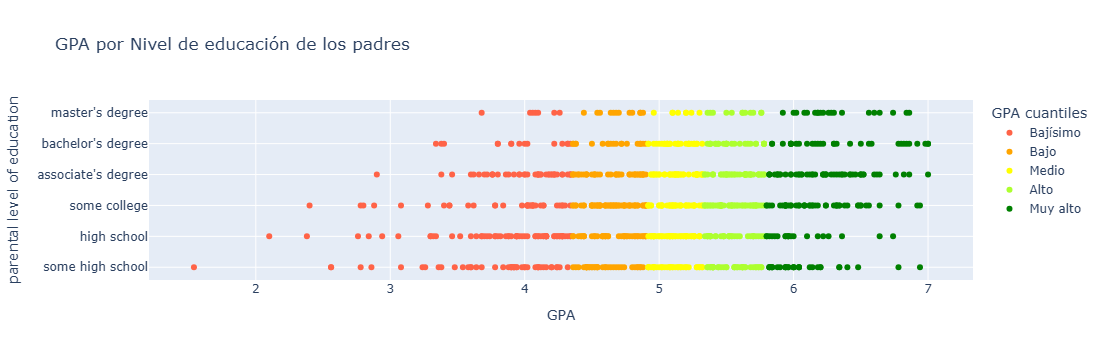

In [183]:
# Código de gráfico del amigo ChatGPT
fig = px.scatter(
    df_grades.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig

**¿Es posible visualizar alguna tendencia en el gráfico?**

```
En el gráfico se puede observar que para el nivel de educación con master el rango de valores de GPA es más acotado, el valor mínimo es superior a 3.5, mientras que para el nivel "some high school" el rango de valores es más amplio, con valores mínimo de GPA menores a 2. Sin embargo, el valor máximo de masters degree es menor que el valor obtenido por some high school.

A nivel de tendencia, se ve que el rango de valores de GPA tiende a disminuir a medida que hay mayor nivel de estudios de los padres.

Los cuantiles bajo, medio y alto son bastante similares entre los niveles educacionales de los padres. Las mayores diferencias se ven en los extremos, es decir en los cuantiles bajisimos y muy altos. A menor nivel de estudios de los padres, pareciera ser que el GPA será menor a medida que hay menor nivel de estudios, pero en el cuantil muy alto no hay una tendencia notable según el nivel de educación de los padres. 

```

## 4. Operaciones con tablas [2.0 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYWx5dTBkMGhhOTJmeGQzbDV5M21rNTN1NWVwMm1qbHd3cjh3Nmk4NSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/13HBDT4QSTpveU/giphy.gif">
</p>



### 4.1 Carga de datos y concatenar dataset [0.2 Puntos]

Ya finalizado en análisis inicial, ud. y su equipo le entregaron a *Don Caguayo* (rector de la Universidad de la Cachaña) tanto los resultados del análisis como también la base de datos limpia y lista para ser almacenada. Dada la ingente cantidad de los datos, el equipo de TI de la universidad resolvió separar el dataset en dos bases de datos distintas (lo que según argumentan ellos, permitiría hacer agregaciones de forma más eficiente).

Gracias a la excelente labor de ud. y su equipo en el análisis previo, el rector le solicita continuar el trabajo con una nueva batería de análisis. Por este motivo, la sección de TI les entrega nuevamente los datos. Sin embargo, argumentan que dada una escazes de personal, solo le entregarán *dumps* (copias) de cada base de datos y su equipo deberá unir las bases de datos. Los datos se encuentran en los siguiente archivos `.json`: `students_grades_1.json` y `students_grades_2.json`.


Por ende, ud. y su equipo deciden que la primera tarea se centrará en cargar estos datos y unirlos.

**No se preocupe por la limpieza ni transformar el tipo de datos de las columnas, ni tampoco transformar a notas chilenas**, recuerde que anteriormente ya se encargo de este tema.


Hint: investigue el método `concat`

**Respuesta:**

In [184]:
# Inserte su respuesta aquí
df_grades_1= pd.read_json('students_grades_1.json')
df_grades_2= pd.read_json('students_grades_2.json')

df_grades= pd.concat([df_grades_1, df_grades_2], axis = 0)



**Explorar los datos importados**

In [185]:
df_grades_1.shape

(600, 11)

In [186]:
print(df_grades_1.head(3))

              names  gender race/ethnicity parental level of education  \
0     Rita Courtney  female        group B            some high school   
1  Charles Linstrom    male        group A           bachelor's degree   
2       Brian Young    male        group C            some high school   

      lunch test preparation course  math score  reading score  writing score  \
0  standard                    none        3.22           3.76           3.76   
1  standard               completed        5.80           5.68           5.86   
2  standard                    none        5.38           4.96           4.78   

    GPA GPA cuantiles  
0  3.58      Bajísimo  
1  5.78          Alto  
2  5.04         Medio  


In [187]:
df_grades_2.shape

(400, 11)

In [188]:
print(df_grades_2.head(3))
print(df_grades_2.tail(3))

                names  gender race/ethnicity parental level of education  \
601  Anastasia Starks  female        group B                 high school   
602  Dolores Sprinkle  female        group C           bachelor's degree   
603      Jeremy Smith    male        group D            some high school   

            lunch test preparation course  math score  reading score  \
601  free/reduced               completed        5.02           5.68   
602      standard                    none        5.02           5.14   
603      standard               completed        5.44           5.26   

     writing score   GPA GPA cuantiles  
601           5.74  5.48          Alto  
602           5.50  5.22         Medio  
603           5.68  5.46          Alto  
               names  gender race/ethnicity parental level of education  \
1000  Marina Zeigler  female        group C           bachelor's degree   
1001   Laurie Carter  female        group B            some high school   
1002    Amanda Pe

In [189]:
print(df_grades.head(3))
print(df_grades.tail(3))

              names  gender race/ethnicity parental level of education  \
0     Rita Courtney  female        group B            some high school   
1  Charles Linstrom    male        group A           bachelor's degree   
2       Brian Young    male        group C            some high school   

      lunch test preparation course  math score  reading score  writing score  \
0  standard                    none        3.22           3.76           3.76   
1  standard               completed        5.80           5.68           5.86   
2  standard                    none        5.38           4.96           4.78   

    GPA GPA cuantiles  
0  3.58      Bajísimo  
1  5.78          Alto  
2  5.04         Medio  
               names  gender race/ethnicity parental level of education  \
1000  Marina Zeigler  female        group C           bachelor's degree   
1001   Laurie Carter  female        group B            some high school   
1002    Amanda Perez  female        group A              

In [190]:
df_grades.shape

(1000, 11)

### 4.2 Análisis por Nivel Educacional Etnia de los Padres [0.8 Puntos]

El rector, basado en su experiencia, cree fuertemente que el nivel educacional y la etnia de los padres influyen en las notas que obtienen sus hijos.
Como científicos de datos, ud. y su equipo creen que deben encontrar evidencia para confirmar o refutar la hipótesis del rector.

Para esto, deciden generar dos análisis: una tabla de resumen por una parte y gráficos de caja por otro.


**Tabla de Resumen [0.5 Puntos]**


Para generar la tabla de resumen:

- [X] Calcular el promedio de las notas y guardarlo en una variable `GPA` (grade point average).
- [X] Hacer una simplificación a través de un mapeo (investigar el método `map()`) de la variable `parental level of education`  según la siguiente conversión:

        some high school -> school
        some college -> school
        high school -> school
        bachelor's degree -> college
        associate's degree -> college
        master's degree -> postgraduate

  Los resultados de este mapeo deben ser guardados en la columna `simple parental level of education`.


- [X] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener el promedio de las notas.
- [X] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener un conteo de los alumnos en cada grupo y agregarlos como una nueva fila count.
- [X] Obtener el porcentaje de alumnos con respecto al total. Los porcentajes deben ser strings que contienen la frecuencia de cada grupo con respecto al total y deben ser terminados en '%'.

Utilizar la tabla de resultados esperados como guía para desarrollar este punto.


**Análisis [0.3 Puntos]**

Finalmente, responda las siguientes preguntas sobre el gráfico de caja que viene implementado a continuación. En este se muestra el GPA con respecto al nivel educacional, donde la variable de color es la etnicidad.

- [X]  ¿Hay alguna diferencia entre los grupos graficados tanto para el nivel educacional de los padres como también para la etnicidad?


**Respuesta:**

In [191]:
# Inserte su respuesta aquí

# Promedio de notas (ya hecho en la tabla)
# Simplificación de la variable 'parental level of education'
replaces = {
    'some high school': 'school',
    'some college': 'school',
    'high school': 'school',
    "bachelor's degree": 'college',
    "associate's degree": 'college',
    "master's degree": 'postgraduate'
}

df_grades['simple parental level of education'] = df_grades['parental level of education'].map(replaces)

# Primera agregación
df_grades_agg = df_grades.groupby(['race/ethnicity', 'simple parental level of education']).mean(numeric_only = True)

# Segunda agregación
df_grades_agg['count'] = df_grades.groupby(['race/ethnicity', 'simple parental level of education']).count()['names']

# Porcentajes con respecto al total de alumnos (valor como string y con un '%' al final)
df_grades_agg['percentage'] = (df_grades_agg['count'] / df_grades_agg['count'].sum() * 100)
df_grades_agg = df_grades_agg.round(2)
df_grades_agg['percentage'] =  df_grades_agg['percentage'].astype(str) + '%'

# Mostrar resultado
df_grades_agg

math score  reading score  \
race/ethnicity simple parental level of education                              
group A        college                                   4.83           5.05   
               postgraduate                              4.46           4.88   
               school                                    4.65           4.81   
group B        college                                   5.03           5.24   
               postgraduate                              5.03           5.81   
               school                                    4.69           4.90   
group C        college                                   5.03           5.36   
               postgraduate                              5.02           5.23   
               school                                    4.74           5.00   
group D        college                                   5.06           5.22   
               postgraduate                              5.35           5.63   
               school                                    4.99           5.13   
group E        college                                   5.53           5.45   
               postgraduate                              5.48           5.93   
               school                                    5.35           5.27   

                                                   writing score   GPA  count  \
race/ethnicity simple parental level of education                               
group A        college                                      4.95  4.94     26   
               postgraduate                                 5.06  4.80      3   
               school                                       4.66  4.71     60   
group B        college                                      5.16  5.14     61   
               postgraduate                                 5.63  5.49      6   
               school                                       4.79  4.79    123   
group C        college                                      5.33  5.24    118   
               postgraduate                                 5.17  5.14     19   
               school                                       4.89  4.88    182   
group D        college                                      5.24  5.17     78   
               postgraduate                                 5.78  5.59     23   
               school                                       5.11  5.08    161   
group E        college                                      5.43  5.47     57   
               postgraduate                                 5.83  5.74      8   
               school                                       5.11  5.25     75   

                                                  percentage  
race/ethnicity simple parental level of education             
group A        college                                  2.6%  
               postgraduate                             0.3%  
               school                                   6.0%  
group B        college                                  6.1%  
               postgraduate                             0.6%  
               school                                  12.3%  
group C        college                                 11.8%  
               postgraduate                             1.9%  
               school                                  18.2%  
group D        college                                  7.8%  
               postgraduate                             2.3%  
               school                                  16.1%  
group E        college                                  5.7%  
               postgraduate                             0.8%  
               school                                   7.5%

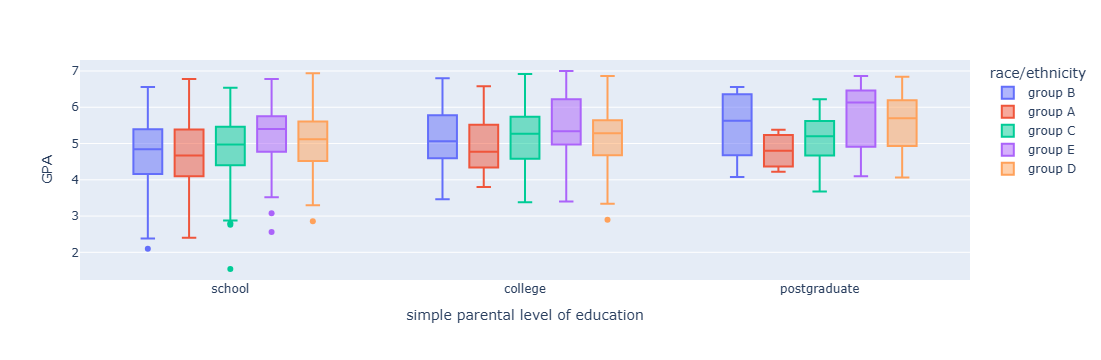

In [192]:
fig = px.box(
    df_grades,
    x="simple parental level of education",
    y="GPA",
    color="race/ethnicity",
    hover_data=["GPA"],
)
fig.show()

 A simple vista, se observa que los GPA de padres con nivel de postgraduate tienden a tener una distribución con valores más altos y con menos dispersión en los boxplot. 

Los padres con nivel school tienen hijos con distribución del GPA más dispersos, pero hay personas que obtienen valores altos (el límite superior del boxplot en varios grupos es cercano a 7). Sin embargo, en este nivel de educación se observan más valores atípicos en la parte inferior de la distribución. 

Los estudiantes con padres que llegaron a college tienen una condición intermedia, ya que tienen menor dispersión en los datos de padres con school pero mayor dispersión que el nivel con padres con postgraduate. 

La mediana es mayor en casi todos los grupos en el nive postgraduate. Solo en el grupo C de los postgraduate, hay un leve valor inferior en comparación a la mediana de los college. 

Con respecto a la ethnicity, no se ve un patron claro. 




**Resultados Esperados**

Esta tabla ilustra la estructura del dataframe a conseguir. Los valores son referenciales, no necesariamente son los esperados.

|    | race/ethnicity   | simple parental level of education   |   math score |   reading score |   writing score |   GPA |   count | percentage   |
|---:|:-----------------|:-------------------------------------|-------------:|----------------:|----------------:|------:|--------:|:-------------|
|  0 | group A          | college                              |         4.83 |            5.05 |            4.95 |  4.94 |      26 | 2.6 %        |
|  1 |                  | postgraduate                         |         4.46 |            4.88 |            5.06 |  4.80 |       3 | 0.3 %        |
|  2 |                  | school                               |         4.65 |            4.81 |            4.66 |  4.71 |      60 | 6.0 %        |
|  3 | group B          | college                              |         5.03 |            5.24 |            5.16 |  5.14 |      61 | 6.1 %        |
|  4 |                  | postgraduate                         |         5.03 |            5.81 |            5.63 |  5.49 |       6 | 0.6 %        |
|  5 |                  | school                               |         4.69 |            4.90 |            4.79 |  4.79 |     123 | 12.3 %       |
|  6 | group C          | college                              |         5.03 |            5.36 |            5.33 |  5.24 |     118 | 11.8 %       |
|  7 |                  | postgraduate                         |         5.02 |            5.23 |            5.17 |  5.14 |      19 | 1.9 %        |
|  8 |                  | school                               |         4.74 |            5.00 |            4.89 |  4.88 |     182 | 18.2 %       |
|  9 | group D          | college                              |         5.06 |            5.22 |            5.24 |  5.17 |      78 | 7.8 %        |
| 10 |                  | postgraduate                         |         5.35 |            5.63 |            5.78 |  5.59 |      23 | 2.3 %        |
| 11 |                  | school                               |         4.99 |            5.13 |            5.11 |  5.08 |     161 | 16.1 %       |
| 12 | group E          | college                              |         5.53 |            5.45 |            5.43 |  5.47 |      57 | 5.7 %        |
| 13 |                  | postgraduate                         |         5.48 |            5.93 |            5.83 |  5.74 |       8 | 0.8 %        |
| 14 |                  | school                               |         5.35 |            5.27 |            5.11 |  5.25 |      75 | 7.5 %        |


### 4.3 Joins, joins y más joins [1 punto]

Mientras le notificaba por videollamada los resultados de sus descubrimientos a Don Caguayo, un exaltado practicante del area de TI entra a la reunión y les informa que ha encontrado una nueva base de datos que cuenta con las notas de dos asignaturas (en escala chilena): historia y ciencias.
Para más remate, antes de huir, el practicante les cuenta que este dataframe lamentablemente contiene registros de alumnos que ya no forman parte de la universidad, por lo que no deben ser parte de este análisis.


El rector (evidentemente molesto por la situación) les ruega incluir estos datos (vaciados en el archivo other_grades.csv) al estudio original(`students_grades.csv`).


Para esto, carge el archivo `other_grades.csv` y busque la forma de unir ambos DataFrames, de tal manera que las columnas de `history score` y `science score` se anexen al final del DataFrame original. **NO LIMPIE LOS DATOS**, si no que explore los distintos tipos de merge para encontrar el mas situable para su situación (y así evitar buscar duplicados o **alumnos que no pertenecen a la universidad**).

**To-Do**


- [X] Cargar el `other_grades.csv`
- [X] Unir `df_grades` con `other_grades.csv` usando outer join y explique el resultado.
- [X] Unir `df_grades` con `other_grades.csv` usando left join y explique el resultado.
- [X] Unir `df_grades` con `other_grades.csv` usando right join y explique el resultado.
- [X] Unir `df_grades` con `other_grades.csv` usando inner join y explique el resultado.
- [X] Defina cuál join es el que utilizará para generar el nuevo DataFrame.

> **Hint**: Puede explicar los resultados del merge a través de la cantidad de filas resultantes y los valores que estas contienen.

**Respuesta:**

In [193]:
#Importar la base de datos
other_grades = pd.read_csv('other_grades.csv')

In [194]:
#Ver filas de other grades
other_grades.shape[0]

1150

In [195]:
#Recordar las filas del dataframe df_grades
df_grades.shape[0]

1000

In [196]:
# Implementación de merge con distintos how
df_grades_outer = pd.merge(df_grades, other_grades, on = 'names', how = 'outer')
df_grades_left = pd.merge(df_grades, other_grades, on = 'names', how = 'left')
df_grades_right = pd.merge(df_grades, other_grades, on = 'names', how = 'right')
df_grades_inner = pd.merge(df_grades, other_grades, on = 'names', how = 'inner')

**Imprimir los resultados**

In [197]:
print('Outer join:')
display(df_grades_outer.head())
print(f'Cantidad de datos: {df_grades_outer.shape[0]}')
print('===========================================')
print('Left join:')
display(df_grades_left.head())
print(f'Cantidad de datos: {df_grades_left.shape[0]}')
print('===========================================')
print('Right join:')
display(df_grades_right.head())
print(f'Cantidad de datos: {df_grades_right.shape[0]}')
print('===========================================')
print('Inner join:')
display(df_grades_inner.head())
print(f'Cantidad de datos: {df_grades_inner.shape[0]}')

Outer join:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,GPA cuantiles,simple parental level of education,science score,history score
0,Aaron Morgan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.35,5.46
1,Aaron Oakden,male,group D,high school,free/reduced,none,4.96,5.44,5.14,5.18,Medio,school,3.76,4.60
2,Aaron Shelly,male,group D,associate's degree,standard,none,4.66,3.88,3.76,4.10,Bajísimo,college,3.88,3.90
3,Abigail Hall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.88,4.59
4,Adam Collins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.32,2.57


Cantidad de datos: 1150
Left join:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,GPA cuantiles,simple parental level of education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,Bajísimo,school,2.50,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,Alto,college,4.36,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,Medio,school,4.48,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,Alto,school,5.32,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,Muy alto,school,6.64,4.6


Cantidad de datos: 1000
Right join:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,GPA cuantiles,simple parental level of education,science score,history score
0,Pam Otoole,female,group B,bachelor's degree,standard,none,5.32,5.32,5.44,5.36,Alto,college,4.42,4.0
1,Diane Olson,female,group C,some college,standard,completed,5.14,6.40,6.28,5.94,Muy alto,school,3.88,4.8
2,Sarah Flannery,female,group B,master's degree,standard,none,6.40,6.70,6.58,6.56,Muy alto,postgraduate,5.32,6.1
3,Stanley Chappell,male,group A,associate's degree,free/reduced,none,3.82,4.42,3.64,3.96,Bajísimo,college,3.82,3.7
4,Arnold Dodson,male,group C,some college,standard,none,5.56,5.68,5.50,5.58,Alto,school,4.60,5.2


Cantidad de datos: 1150
Inner join:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,GPA cuantiles,simple parental level of education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,Bajísimo,school,2.50,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,Alto,college,4.36,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,Medio,school,4.48,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,Alto,school,5.32,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,Muy alto,school,6.64,4.6


Cantidad de datos: 1000


**Outer join:**
Se genera un nuevo dataframe con 1150 filas. Este dataframe conserva las filas que tienen en común el dataframe de la izquierda y derecha y las que no tiene en común. Llena con valores NA o NAN cuando no hay dato en una celda en particular. Por ello, aumentaron las filas con respecto al dataframe original, que era solo de 1000. Ahora son 1150 filas, porque hay algunos names que no estaban en el dataframe df_grades.

**Left join:**
Esta función genera un nuevo dataframe con 1000 filas. Lo que hace es que conserva solo las filas que estaban en el df_grades o dataframe de la izquierda. Si los names del other_grades no coinciden con los names de df_grades, entonces no se conservan (por lo tanto, no se agregan estudiantes nuevos al dataframe que se genera con esta unión).

**Right join:**
Esta función es unión por la derecha, esto quiere decir que conserva todas las filas del dataframe de la derecha y las filas del dataframe de la izquierda que no tienen coincidencia van a desaparecer. El total de filas son 1150. Este resultado se parece al obtenido con outer join.

**Inner join:**
Esta unión usa la intersección de las filas de ambos dataframes. Esto quiere decir que va a conservar los nombres que haya en común en ambos dataframes. El resultado da un dataframe con 1000 filas, ya que todos los names de df_grades estaban en el other_grades. 

**Decisión de unión**:
Para analizar la decisión correcta, citemos lo que dijeron en el enunciado:
"NO LIMPIE LOS DATOS, sino que explore los distintos tipos de merge para encontrar el más situable para su situación (y así evitar buscar duplicados o alumnos que no pertenecen a la universidad)"

Entonces, no se quiere que se incluyan alumnos que no pertenecen a la universidad. El dataframe que tiene datos de alumnos que no son de la Universidad es el other_grades, que siempre lo pusimos en la posición de dataframe de la derecha. 
Considerando que el estudio original es el que se estuvo trabajando en todo el lab y que esta nueva información obtenida del other_grades es adicional, diríamos que el left join sería el más apropiado, ya que agrega información adicional de estas nuevas pruebas, pero conserva toda la información del dataframe de la izquierda que es el df_grades. 
Hay que considerar que los dataframes obtenidos con left e inner son equivalentes en este ejercicio, pero si el dataframe de la derecha hubiese tenido menos de los 1000 nombres que tenía el df_grades, entonces se habría perdido información del dataframe original que se estuvo trabajando en todo el lab. Por lo anterior, el join elegido es el left. 


# Conclusión


Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>